<a href="https://colab.research.google.com/github/BenjaminRiordan/workshops-and-tutorials/blob/main/KBS_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://drive.google.com/uc?id=1RX3rnToFo-jh_NAiCUoY4fKt8Xv2ituI" width="1000"></center>


# **KBS Workshop 2024**
Ben Riordan, Zhen He, Emmanuel Kuntsche
---

Welcome to the 'handy dandy colab notebook' for our KBS tutorial. I've tried to make this colab notebook super gentle and easy to use and I've written it so you don't have to write any code (though I am going to encourage you to play with the code and try to break things).

To navigate through the notebook, you can use the "Table of Contents" on the left or you can just scroll down and follow along as I present. My hope is that you follow through as I talk, but I wouldn't do that... so feel free to jump around and have some fun.

To run the code in any of the cells, you can hit the "play" icon in the top left corner. Alternatively, feel free to click on the codeblock and press "ctrl" and "enter" or just mash the keyboard until something happens.

I have also written the code so each example can "stand alone". This is so that if your notebook "times out" or if you want to copy and paste code into your own file you can do so without having to jump around too much.

Finally, this is a presentation about AI in research and if you look into the top right of your screen you will see "Colab AI". If you have any questions while going through, you can click on that and ask our AI overlord a question about the code:
* "what does this package do?"
* "What does this code mean?"
* "What other AI models can I use for this question?"

## **Materials and resources**

The materials for this tutorial can be found on GitHub: https://github.com/BenjaminRiordan/workshops-and-tutorials/tree/main/KBS2024

**Tutorial paper**

Most of the code and examples have come from our tutorial paper, but we have a few papers on zero-shot learning (which is going to be our main focus):

* Riordan B, Bonela AA, He Z, Nibali A, Anderson-Luxford D, Kuntsche E. How to apply zero-shot learning to text data in substance use research: An overview and tutorial with media data. Addiction. 2024; 119(5): 951–959. https://doi.org/10.1111/add.16427

**Other papers**

*Comparison of ZSL and dedicated deep learning algorithm*

* Bonela, A.A., et al. The promise of zero-shot learning for alcohol image detection: comparison with a task-specific deep learning algorithm. Sci Rep 13, 11891 (2023). https://doi.org/10.1038/s41598-023-39169-4

*Commentary on why ZSL*

* Kuntsche E, He Z, Bonela AA, Riordan B. Zero-shot learning has the potential to revolutionise research on exposure to alcohol and other drugs in digital media. Int J Drug Policy. 2023 Aug;118:104098. https://doi.org/10.1016/j.drugpo.2023.104098.



## Example 1. Supervised machine learning: Regression

We want to train a model to predict the number of likes a Neon Ghost post gets from the number of followers she has at the time of posting.

This is about as simple as we can make this task, but we could add more variables, like whether the post references alcohol and day of the week of the post to get a little crazy with it!

<center><img src="https://drive.google.com/uc?id=1zmW1Eb8NpMg6ZB7gro-phrvZHBbRt4bn" width="600"></center>


### Cell 1a. Fit model

Here we are going to load the packages required, generate some fake data, fit a regression, and plot it.

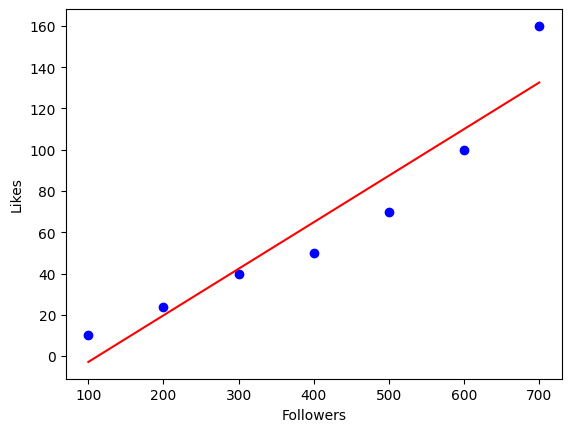

In [2]:
# Import necessary libraries
import pandas as pd # Data manipulation (here we will use it to make a data frame)
import matplotlib.pyplot as plt  # Make a plot
from sklearn.linear_model import LinearRegression #regression

# Hypothetical dataset - we are just going to bang in some numbers, but you could read in a dataset here instead.
# Feel free to add your own numbers and break this thing
data = {
    'followers': [100, 200, 300, 400, 500, 600, 700],
    'likes': [10, 24, 40, 50, 70, 100, 160]
}

# Make it a dataframe for analysis.
df = pd.DataFrame(data)

# Specify our predictor (followers) and our outcome (likes)
X = df[['followers']]
y = df['likes']

# Initialize the model
model = LinearRegression()

# Fit the model to the entire data - WE ARE DOING IT!!!! OMG. We are totes machine learning
model.fit(X, y)

# Plot the data and the regression line
plt.scatter(df['followers'], df['likes'], color='b')
plt.plot(df['followers'], model.predict(df[['followers']]), color='r')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()


### Cell 1b. Predict new data

Now that we have a model, we can use it to predict new data points. Here we are going to estimate how many posts Neon Ghost will receive when she has 250 followers.

In [3]:
# PREDICT NEW DATAPOINTS

# New post with a certain number of followers
new_post = pd.DataFrame({'followers': [250]})

# Predict the number of likes for the new post
predicted_likes = model.predict(new_post)

#Print the number
print(f"Predicted number of likes for the new post: {predicted_likes[0]}")


Predicted number of likes for the new post: 30.999999999999986


### Cell 1c. New graph

Here, we are going to plot a graph with our new point on it.

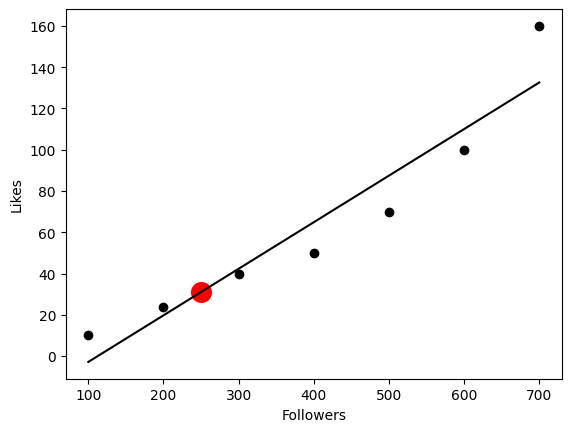

In [4]:
# Add the new post to the plot
plt.scatter(df['followers'], df['likes'], color='k')
plt.plot(df['followers'], model.predict(df[['followers']]), color='k')
plt.scatter(new_post['followers'], predicted_likes, color='r', s=200)
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()

## Example 2. Unsupervised machine learning: Topic model

We want to use unsupervised machine learning to identify the different topics from Neon Ghost's cyber-gram posts. We are going to use a technique called Latent Dirichlet Allocation (LDA). The aim of LDA is to find topics that a document belongs to based on the words used. It assumes that similar topics will use similar words.

I  have never really found LDA to be that useful (particularly for short text like Tweets)... but the point is to show you how it looks.

For more information, I recommend the TidyText book (for R) or Julia Silge's screencasts:

https://www.youtube.com/watch?v=rXDv0ZuX0Fc&ab_channel=JuliaSilge

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1iig1mjC_1gt1YdhnEXn1-9Abtg9Wdgj7" width="200" />
</p>


### Cell 2a. Load the packages we need

In [5]:
# Packages we need

import nltk # Natural language tool kit
from gensim import corpora # Process text corpus
from gensim.models import LdaModel # Latent dirichlet model
from pprint import pprint # prints data structures... but pretty

nltk.download('punkt') #tokeniser


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Cell 2b. Generate some example posts

I have generated some silly examples with 2 clear themes - 1. booze and 2. the cold cold cyber-punk world.

Feel free to add your own examples or extend these.

In [6]:
# Let's say we have a collection of posts from the fictional influencer "Neon Ghost".
documents = [
    "Glasses of whiskey and beer cloud my mind",
    "Nothing like whiskey and beer in my favourite bar the underdark",
    "I love cyber whiskey and beer in the underdark bar",
    "More whiskey in the underdark bar",
    "This city is cold",
    "This cold city",
    "I hate the cold cold city",
    "This neon city is cold",
    "Cold neon city You break me"
    # ... feel free to add more and more creative examples, I really leaned into the "cold hard city" vibes ...
]

### Cell 2c. Tokenise and cluster

Here we are going to tokenise the documents. Tokenising is where we break down text into bits called 'tokens' (e.g., breaking it down to individual words)

In [7]:

# Tokenize the documents.
tokenized_documents = [nltk.word_tokenize(doc) for doc in documents]

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(tokenized_documents)

# Convert document into the bag-of-words (BoW) format = list of (token_id, token_count) tuples.
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

# Set training parameters. Note that we can select how many topics we want. I've really forced 2 clear topics with the data, but you can change the 2 to a 3 and see what happens.
num_topics = 2
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Eh. This is going to take time. Don't do this.

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

top_topics = model.top_topics(corpus)

# If you use this method in practice, you can change the number of topics and calculate "coherence scores" and compare whether models with more/fewer topics are more interpretable.
# We won't run them here because I am lazy and trying to keep the code clean.

### Cell 2d Plot the topics

We are going to plot the frequency of the words as a bar chart. This is by far the nicest way to visualise the topics. I know that you have probably been told that bar charts have no place in this world, but we should be fine for situations where we are plotting the fequency of words.

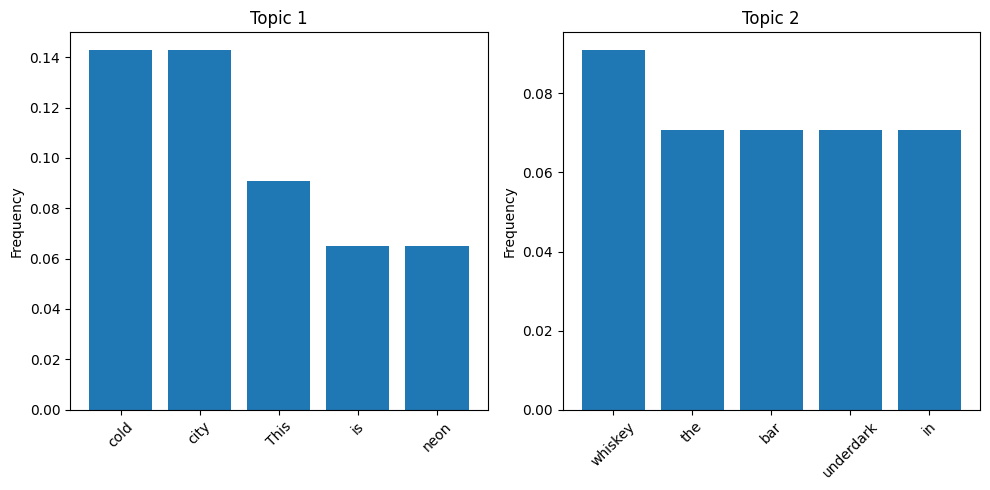

In [8]:
# Package for plot
# note - we already included this code above, but I am going to assume your notebook has timed out because I talked too much and it'll make you reload it.
import matplotlib.pyplot as plt

# Get the top 5 words from each topic
top_words = [[word for word, _ in model.show_topic(topicid, topn=5)] for topicid in range(model.num_topics)]

# Get the frequencies of the top 5 words from each topic
top_frequencies = [[freq for _, freq in model.show_topic(topicid, topn=5)] for topicid in range(model.num_topics)]

# Create a figure with 2 subplots (one for each topic)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# For each topic, create a bar plot of the word frequencies
for i in range(2):
    axs[i].bar(top_words[i], top_frequencies[i])
    axs[i].set_title(f'Topic {i+1}')
    axs[i].set_ylabel('Frequency')
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(45)

# Display the plot
plt.tight_layout()
plt.show()


# Zero-Shot learning

Zero-shot learning is where we use a trained model (like a Large Language Model) to classify data it has not specifically been trained on.


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1WU5Cg1yjUy-tJN2iWyRVFqypqf2URf6r" width="600"/>
</p>

## Example 3. Zero-shot learning - Text

We are going to use BARTLarge to analyse whether a Tweet that mentions a blackout is alcohol-related or not. These examples are entirely made up, but are based on a number of papers we wrote on how alcohol-related blackouts are referenced on Twitter.

This code is also very basic, but we cover it at length in our tutorial.


**ZSL tutorial:**

Riordan B, Bonela AA, He Z, Nibali A, Anderson-Luxford D, Kuntsche E. How to apply zero-shot learning to text data in substance use research: An overview and tutorial with media data. Addiction. 2024; 119(5): 951–959. https://doi.org/10.1111/add.16427


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1_bYip1yZnxryP-1mEngNykCpmElT3lrp" width="200"/>
</p>


### Cell 3a. BARTLarge

Here we initialise the pipeline and specify "zero-shot-classification" and select our model "facebook/bart-large-mnli". Note that we can specify other tasks using the pipeline function, like "question-answering" where it give you answers from the text or "summarization" where it will summarise text. Note that, from memory, with Bartlarge's "question-answering" it will only answer the question with information from within the target text.


Anyway, here we care about "zero-shot classification", so lets leave it at that!

In [10]:
# Load up our packages - bart large is large and might take a while

from transformers import pipeline

# Initialise the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

### Cell 3b. Data and candidate labels

In order to perform classification we must nominate candidate labels for the model to choose between. In this scenario we have two labels, but you can choose as many labels as you need.

Feel free to play round with the labels like:
1. labels = ["alcohol", "not alcohol"]
2.  labels = ["booze", "power outage"]
3. labels = ["A tweet about alcohol blackout", "A tweet about a power outage"]

You can also add your own examples. Try adding some tough ones like "blackout" or "wow, full on blackout". We also saw some posts that referenced an anger blackout (e.g., "I was so mad I blacked out"), you can add some of these examples and see how the model performs!

In [59]:
# Here we give it some fake Tweets about blackouts!
tweets = [
    "The city is experiencing a massive blackout. Neon lights are off.",
    "I had too many beers last night and blacked out. I remember nothing.",
    "The neon signs are all off due to the blackout.",
    "Blacked out last night and lost my purse. Classic blackout RM",
    "Get a research question or get out of the city that is experiencing blackouts",
    "Every time I drink whiskey I blackout",
    "The cybernetic implants are useless without power. Another blackout.",
    "Having a cocktail at the club and now I'm blacking out",
    "The blackout has made navigating the city a challenge, all the lights are off.",
    "Drinking a vodka tonic is the best way to blackout.",
    "blackout",
    "Wow! Full blown blackout"
]

# Define the candidate labels
labels = ["alcohol-related", "not alcohol-related"]


### Cell 3c. Print the classifications

Below we will print the tweet and the % in which the Tweet matches each of the categories "alcohol-related" or "not alcohol-related".

The example below shows that the Tweet is 99.88% alcohol-related vs. 0.12% non-alcohol-related.

* "*Drinking a vodka tonic is the best way to blackout*"

**alcohol-related**: 0.9988

**not alcohol-related**: 0.0012


In [60]:
# Perform zero-shot classification on each tweet
for tweet in tweets:
    print(f"Analyzing tweet: {tweet}")
    result = classifier(tweet, labels)

    # Print the results
    for label, score in zip(result["labels"], result["scores"]):
        print(f"{label}: {score:.4f}")
    print("\n")

Analyzing tweet: The city is experiencing a massive blackout. Neon lights are off.
not alcohol-related: 0.7896
alcohol-related: 0.2104


Analyzing tweet: I had too many beers last night and blacked out. I remember nothing.
alcohol-related: 0.9977
not alcohol-related: 0.0023


Analyzing tweet: The neon signs are all off due to the blackout.
alcohol-related: 0.6131
not alcohol-related: 0.3869


Analyzing tweet: Blacked out last night and lost my purse. Classic blackout RM
alcohol-related: 0.9357
not alcohol-related: 0.0643


Analyzing tweet: Get a research question or get out of the city that is experiencing blackouts
not alcohol-related: 0.7328
alcohol-related: 0.2672


Analyzing tweet: Every time I drink whiskey I blackout
alcohol-related: 0.9971
not alcohol-related: 0.0029


Analyzing tweet: The cybernetic implants are useless without power. Another blackout.
not alcohol-related: 0.8475
alcohol-related: 0.1525


Analyzing tweet: Having a cocktail at the club and now I'm blacking out
a

### Cell 3d. Try your own text examples

Now you can enter your own text and candidate labels to classify data.

Pick a problem, like:

1. In a large survey, participants were asked to write about why they drink alcohol. We want to classify their responses as either "enhancement", "coping", "social", or "conformity".
2. We collectd all the Facebook posts that referenced the alcohol ban at the Paris olympics. we want to determine whether the poster thought "the alcohol ban is good", "the alcohol ban is bad", or "the alcohol ban is neither good nor bad".
3. We collected some song lyrics and want to know what the sentiment is "positive", "negative" or "neutral".


Just replace the "tweets" with some different examples. Change the "labels" to new labels and then click play!

For the example below I have considered an entirely fictitious group of researchers who work together. Based on Tweets about them, they want to work out who is the coolest. It is pretty clear that the fictitious researcher named "Ben" is the coolest. But it is important we analyse social media posts to find out.

In [11]:
# Note that this will only run if you have initialised the classifier in cell 3a. If you get an error, have a crack at running that cell and coming back to here.

tweets = [
    "Ben is cooler than Jen",
    "Jen is not as cool as Ben",
    "Rose Marie is not nearly as cool as Ben",
    "Ben is cooler than Rose Marie and Jen",
    "I think my ranking is Ben is the coolest, then Rose Marie, then Jen? Or maybe Ben is the coolest, then Jen, then Rose Marie? Ben is definitely the coolest",
    "I can't believe Ben would spend his Sunday writing these out. What a nerd. Jen and RM are far cooler"
]

# Define the candidate labels
labels = ["Ben is the coolest", "Jen is the coolest", "Rose Marie is the coolest"]

# Perform zero-shot classification on each tweet
for tweet in tweets:
    print(f"Analyzing tweet: {tweet}")
    result = classifier(tweet, labels)

    # Print the results
    for label, score in zip(result["labels"], result["scores"]):
        print(f"{label}: {score:.4f}")
    print("\n")

Analyzing tweet: Ben is cooler than Jen
Ben is the coolest: 0.9676
Jen is the coolest: 0.0269
Rose Marie is the coolest: 0.0055


Analyzing tweet: Jen is not as cool as Ben
Ben is the coolest: 0.9603
Jen is the coolest: 0.0365
Rose Marie is the coolest: 0.0032


Analyzing tweet: Rose Marie is not nearly as cool as Ben
Ben is the coolest: 0.9667
Rose Marie is the coolest: 0.0222
Jen is the coolest: 0.0111


Analyzing tweet: Ben is cooler than Rose Marie and Jen
Ben is the coolest: 0.9786
Rose Marie is the coolest: 0.0112
Jen is the coolest: 0.0102


Analyzing tweet: I think my ranking is Ben is the coolest, then Rose Marie, then Jen? Or maybe Ben is the coolest, then Jen, then Rose Marie? Ben is definitely the coolest
Ben is the coolest: 0.9601
Jen is the coolest: 0.0229
Rose Marie is the coolest: 0.0170


Analyzing tweet: I can't believe Ben would spend his Sunday writing these out. What a nerd. Jen and RM are far cooler
Rose Marie is the coolest: 0.5791
Jen is the coolest: 0.3939
Ben 

## Example 4. Zero-shot learning - Images

Here we are going to use CLIP which has been trained on text-image pairs to identify what type of beverage is in an image. In this fictious example, participants were asked to take images of every drink they consumed daily. We want to know how many of these drinks were alcoholic and what type of alcoholic beverage.

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1pRE38TwoG7F14ps89krTrBeu0zyV1nsW" width="600"
  />
</p>


### Cell 4a. CLIP

Here we are going to use CLIP which is trained on image and text pairs to determine whether alcohol is present or not.

In [18]:
!pip install torch torchvision ftfy regex tqdm openai

import torch # tools for deep learning models
from PIL import Image # Python image library - image processing
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize # image transformations
from transformers import CLIPProcessor, CLIPModel #preprocess text/images from CLIP
import requests
from io import BytesIO # loading image from urls

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu" # Selects best device to run the model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

### Cell 4b. Process the images and add the labels

I have added 12 images on github. They are beautifully balanced, there are 3 Beer images, 3 Coffee images, 3 Tea images, and 3 wind images.We are going to load these images in just using the url of each of the images.

The images look like this:

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=157AT1INfpPmvoduqnKTQsaQXgqAq3CMu" width="600"/>
</p>


In [29]:
# Transforms the images before feedinf them to the model (Centercrop crops the center part of the image; ToTensor converts the image to a multidimension aray)
transform = Compose([
    Resize(256, interpolation=Image.BICUBIC),
    CenterCrop(224),
    ToTensor()
])

# Images from Github repository - these were free from Pexels.
image_urls = [
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/BEER1.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/BEER2.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/BEER3.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/COFFEE1.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/COFFEE2.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/COFFEE3.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/TEA1.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/TEA2.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/TEA3.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/WINE1.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/WINE2.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/WINE3.jpg"
]

# Define the labels
labels = ["Beer", "Wine", "Coffee", "Tea"]

### Cell 4c. Run the model and spit out the prediction for each image

Here we are going to keep it really simple and just print the label of the image.

In [26]:
# Perform zero-shot classification on each image
for image_url in image_urls:
    # Open and preprocess the image
    image = transform(Image.open(BytesIO(requests.get(image_url).content))).unsqueeze(0).to(device)

    # Compute the similarity between the image and the text descriptions
    with torch.no_grad():
        similarities = model.get_image_features(image) @ model.get_text_features(processor(labels, return_tensors="pt", padding=True, truncation=True).to(device)["input_ids"]).T

    # Print the result with the highest similarity score
    print(f"Most likely label for {image_url}: {labels[similarities[0].topk(1).indices[0]]}\n")


Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/BEER1.jpg: Beer

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/BEER2.jpg: Beer

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/BEER3.jpg: Beer

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/COFFEE1.jpg: Coffee

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/COFFEE2.jpg: Coffee

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/COFFEE3.jpg: Coffee

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/TEA1.jpg: Tea

Most likely label for https://raw.githubusercontent.com/Ben

### Cell 4d prompt engineering

Well, it sucked with tea. Why don't we use different prompts. CLIP is trained on more descritive phrases, so lets give that a crack.

Holy poop. this example worked out far better than I could've ever imagined. Are you guys seeing this! The magic of phrase engineering!

In [28]:
# Define the labels
labels = ["An image of Beer", "An image of a glass of Wine", "An image of a cup of coffee", "An image of a cup of tea"]

# Perform zero-shot classification on each image
for image_url in image_urls:
    # Open and preprocess the image
    image = transform(Image.open(BytesIO(requests.get(image_url).content))).unsqueeze(0).to(device)

    # Compute the similarity between the image and the text descriptions
    with torch.no_grad():
        similarities = model.get_image_features(image) @ model.get_text_features(processor(labels, return_tensors="pt", padding=True, truncation=True).to(device)["input_ids"]).T

    # Print the result with the highest similarity score
    print(f"Most likely label for {image_url}: {labels[similarities[0].topk(1).indices[0]]}\n")


Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/BEER1.jpg: An image of Beer

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/BEER2.jpg: An image of Beer

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/BEER3.jpg: An image of Beer

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/COFFEE1.jpg: An image of a cup of coffee

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/COFFEE2.jpg: An image of a cup of coffee

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/COFFEE3.jpg: An image of a cup of coffee

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutor


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1WU5Cg1yjUy-tJN2iWyRVFqypqf2URf6r" width="600"/>
</p>

# **I NEED MORE**


So you have made it to the end and feel unfulfilled.

This was just a very very basic step through some models. We have some more fun tasks that are available with our paper. You can go play with that and classify examples of Tweets that are either pro, anti, or neutral legalising cannabis. It also has some pretty important steps that we haven't found time to cover like:

1. how to read in a dataset like a .csv
2. how to export the labelled dataset
3. how to make a confusion matrix to report accuracy

The paper is here and you can find a link to the colab notebook:

Riordan B, Bonela AA, He Z, Nibali A, Anderson-Luxford D, Kuntsche E. How to apply zero-shot learning to text data in substance use research: An overview and tutorial with media data. Addiction. 2024; 119(5): 951–959. https://doi.org/10.1111/add.16427

# Funding

I am sponsered by a Discovery Early Career Research Fellowship, which aims to use AI to better understand the link between exposure to alcohol and alcohol use.

* The imitation game: The prevalence and impact of digital alcohol exposure in digital media. Australian Research Council Discovery Early Career Research Award. DE230100659

For the ZSL text tutorials we have received funding from La Trobe University's School of Psychology and Public Health.

* How to analyse images or videos using Zero Shot Learning: An overview and tutorial. La Trobe University SPPH Internal Grant Scheme, 2024.
* More than just a chatbot: Assessing the performance and promise of large pre-trained models for zero-shot learning. La Trobe University SPPH Internal Grant Scheme, 2023

